<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 10. Введение в нейронные сети

<br />
<br />
19 ноября 2021

### Пятиминутка

1. Приведите несколько примеров композиций моделей
2. Опишите алгоритм AdaBoost
3. Назовите популярные реализации градиентного бустинга и их отличительные особенности

### Задачи, решаемые нейросетями

<table style="width:100%">
  <tr>
    <td><div align="center">
        Картинки
        <img src="images/image_net.jpg" />
        25% $\to$ 3.5% ошибок против 5% у людей
        </div>
    </td>
    <td><div align="center">
        Текст
        <img src="images/machine_translation.png"/>
        </div>
    </td>
    <td><div align="center">
        Голос
        <img src="images/voice.jpg"/>
        </div>
    </td>
  </tr>
  <tr>
    <td><div align="center">
        Го, 2016
        <img src="images/alpha_go.jpg"/>
        </div>
    </td>
    <td><div align="center">
        StarCraft, 2019
        <img src="images/starcraft.png"/>
        </div>
    </td>
    <td><div align="center">
        Структура белка, 2020
        <img src="images/AlphaFold.png"/>
        </div>
    </td>
  </tr>


<div align="center">
    <img src="images/imagenet_progress_pwc.jpeg" alt="imagenet_progress_pwc" />
    <a href="https://paperswithcode.com/sota/image-classification-on-imagenet">
        https://paperswithcode.com/sota/image-classification-on-imagenet</a> 
</div>

### Линейная модель (напоминание)

 $f_j: X \to \mathbb{R}$ — числовые признаки
 
 $a(x, w) = \sigma(\left<w, x\right>) = \sigma \left(\sum\limits_{j=1}^n w_j f_j(x) - w_0 \right)$, 
 
 
 где $w_0, w_1, \dots, w_n \in \mathbb{R}$ — веса признаков
 
 $\sigma(z)$ — функция активации, например, $\text{sign}(z),\ \frac{1}{1+e^{-z}},\ (z)_+$

<div align="center">
    <img src="images/lin_as_nn.jpg" alt="lin_as_nn" width=600 />
</div>


### Нейронная сеть как комбинация линейных моделей

<div align="center">
    <img src="images/nn_two_layers_cropped.jpg" alt="nn_two_layers_cropped" width=800 />
</div>


### Нейронная реализация логических функций

 Функции И, ИЛИ, НЕ от бинарных переменных $x^1$ и $x^2$:

 $x^1 \wedge x^2 = [x^1 + x^2 - \frac{3}{2} > 0]$

 $x^1 \vee x^2 = [x^1 + x^2 - \frac{1}{2} > 0]$

 $\neg x^1 = [-x^1 + \frac{1}{2} > 0]$

<div align="center">
    <img src="images/and_or.jpg" alt="and_or" width=500 />
</div>


### Логическая функция XOR (исключающее ИЛИ)

Функция $x^1 \bigoplus x^2 = [x^1 \neq x^2]$ 

**не реализуема** одним нейроном.
Два способа реализации:
 * Добавлением нелинейного признака:
 
 $x^1 \bigoplus x^2 = [x^1 + x^2 - 2 \color{red}{x^1 x^2} - \frac12 > 0]$

 * <span style="color:red">Сетью</span> (двухслойной суперпозицией) функций И, ИЛИ, НЕ:
 
 $x^1 \bigoplus x^2 = [(x^1 \vee x^2) - (x^1 \wedge x^2) - \frac12 > 0]$.

<div align="center">
    <img src="images/xor_nn.jpg" alt="xor_nn" width=500 />
</div>


### Выразительная способность нейронной сети

 * Двухслойная сеть в $\{0, 1\}^n$ позволяет реализовать произвольную булеву функцию
 * Двухслойная сеть в $\mathbb{R}^n$ позволяет отделить произвольный выпуклый многогранник
 * Трёхслойная сеть в $\mathbb{R}^n$ позволяет отделить произвольную многогранную область (может быть не выпуклой и не связной)
 * С помощью линейных операций и одной нелинейной функции активации $\sigma$ можно приблизить любую непрерывную функцию с любой желаемой точностью
 * Для некоторых специальных классов глубоких нейронных сетей доказано, что они обладают экспоненциально большей выразительной силой, чем неглубокие сети. [V. Khrulkov, A. Novikov, I. Oseledets. Expressive power of recurrent neural networks, Feb 2018, ICLR 2018](https://arxiv.org/pdf/1711.00811.pdf)
 

### Выразительная способность нейронной сети

Функция $\sigma(z)$ — сигмоида, если $\lim\limits_{z \to -\infty} \sigma(z) = 0$ и $\lim\limits_{z \to +\infty} \sigma(z) = 1$

----

**Теорема Цыбенко** (опирается на теорему Колмогорова о представимости многомерных функций)

Если $\sigma(z)$ — непрерывная сигмоида, то для любой непрерывной на $[0,1]^n$ функции $f(x)$ существуют такие значения параметров $w_h \in \mathbb{R}^n,\ w_0 \in \mathbb{R},\ \alpha_h \in \mathbb{R}$, что однослойная сеть

$a(x) = \sum\limits_{h=1}^H \alpha_h \sigma(\left<x, w_h\right> - w_0)$

равномерно приближает $f(x)$ с любой точностью $\varepsilon$:

$|a(x) - f(x)| < \varepsilon$, для всех $x \in [0, 1]^n$

----

G. Cybenko. Approximation by Superpositions of a Sigmoidal Function. Mathematics of Control, Signals, and Systems (MCSS) 2 (4): 303--314 (Dec 1, 1989)


### Двухслойная нейронная сеть с M-мерным выходом

 $ $

<div align="center">
    <img src="images/nn_two_layers.jpg" alt="nn_two_layers" width=800 />
</div>

Вектор параметров модели $w \equiv (w_{jh}, w_{hm}) \in \mathbb{R}^{Hn + H + MH + M}$


<div class="alert alert-info">
<b>Вопрос 1:</b> Что лучше — увеличивать число слоев (глубину) или количество нейронов в слое (ширину)?
</div>

In [2]:
import tensorflow.keras as keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

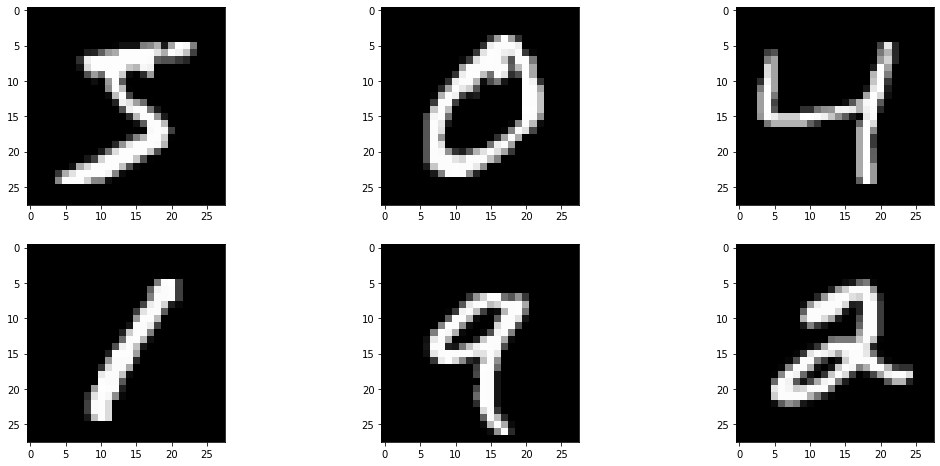

In [3]:
import matplotlib.pyplot as plt
import matplotlib

fig, gs = plt.figure(figsize=(18, 8)), matplotlib.gridspec.GridSpec(2, 3)

for i in range(6):
    plot = fig.add_subplot(gs[i])
    plot.imshow(x_train[i], cmap='gray') # cmap='gray_r'

plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0, 5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

### Линейный классификатор

Предсказание $$ y_{pred} = x \cdot W + b $$

<div align="center">
    <img src="images/linear_classification_scheme.jpg" width=700/>
    $x\quad\quad\quad\cdot\quad W\quad\quad\quad+\quad b$
</div>


### Десять разделяющих плоскостей

<div align="center">
    <img src="images/2D_example.jpg" width=800/>
</div>

 * В нашем примере пространство 784-мерное ($\mathbb{R}^{784}$)


<div class="alert alert-info">
<b>Вопрос 2:</b> Как найти лучшие параметры: матрицу весов $W$ и смещение $b$?
</div>

Если бы $\text{y_true}_i \in \mathbb{R}$ (то есть задача линейной регресии), то для минимизации суммы квадратов разностей (метод наименьших квадратов) ответ вычисляется **аналитически** формулой:
$$\hat{W} = (X^TX)^{-1}X^T\text{y_true}$$

В общем случае решается **численно** минимизацией функции потерь. Чаще всего градиентным спуском (gradient descent).

<div align="center">
    <img src="images/momentum.jpg" width=900/>
</div>

[Distill.pub momentum](https://distill.pub/2017/momentum/)

### Softmax — для классификации

Переводим наши ответы линейной модели в вероятности классов:

$$ p(c=0| x) = \frac{e^{y_0}}{e^{y_0}+e^{y_1}+\dots+e^{y_n}} = \frac{e^{y_0}}{\sum\limits_i e^{y_i}} \\
   p(c=1| x) = \frac{e^{y_1}}{e^{y_0}+e^{y_1}+\dots+e^{y_n}} = \frac{e^{y_1}}{\sum\limits_i e^{y_i}} \\
   \dots
$$


### Принцип максимального правдоподобия (напоминание)

$\arg\max\limits_w {P(Y|w, X)P(w)} \color{red}{=} \arg\max\limits_w \prod\limits_{i=1}^\ell {P(y_i|w, x_i)P(w)} = \\ \arg\max\limits_w \sum\limits_{i=1}^\ell \log P(y_i|w, x_i) + \log P(w)$


### Минимизация функции потерь

$$L(w) = \sum\limits_{i=1}^\ell {\mathcal{L}(y_i, x_i, w)} = -\ln P(y_i|w, x_i) \to \min\limits_w$$

 * это cross-entropy loss для случая $y_i \in \{0, 1\}$
 * в нашем случае

$$ L(W, b) = - \sum\limits_j \ln \frac{e^{(x_jW + b)_{y_j}}}{\sum\limits_i e^{(x_jW + b)_{i}}}$$

 * минимум функции находим стохастическим градиентным спуском

$$ W^{k+1} = W^{k} - \eta \frac{\partial L}{\partial W} \\
   b^{k+1} = b^{k} - \eta \frac{\partial L}{\partial b}$$



<div class="alert alert-info">
<b>Вопрос 3:</b> Почему такая функция потерь — это cross-entropy loss?
</div>

### Обучение по мини-подвыборкам (mini-batch)

Снижаем разброс градиента.

**Вход**: выборка $X^\ell$, темп обучения $\eta$, темп забывания $\lambda$

**Выход**: вектор весов $w \equiv (w_{jh}, w_{hm})$

1. инициализировать веса

2. инициализировать оценку функционала

  $$Q = \frac{1}{\ell} \sum\limits_{i=1}^\ell \mathcal{L}_i (w)$$

3. **повторять**

   4. выбрать $M$ объектов $x_i$ из $X^\ell$ случайным образом
   5. вычислить потерю: $\varepsilon = \frac{1}{M} \sum\limits_{i=1}^M \mathcal{L}_i (w)$
   6. сделать градиентный шаг: $\color{red}{w = w - \eta \frac{1}{M} \sum\limits_{i=1}^M \nabla \mathcal{L}_i (w)}$
   7. оценить функционал: $Q = \lambda \varepsilon + (1 - \lambda) Q$

8. **пока** значение $Q$ и/или веса $w$ не сойдутся


### Однослойная нейросеть для классификации

Для построения нейронной сети на Python продолжим работать с библиотекой keras. Это в свою очередь высокоуровневая надстройка над tensorflow. Большим ее преимуществом является интерфейс, совместимый с sklearn.

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Для того, чтобы градиенты были более стабильными, поделим входные данные на 255 (чтобы они были из диапозона [0,1]). 

И запустим обучение!

In [7]:
# If unspecified, `batch_size` will default to 32
model.fit(x_train.astype("float32") / 255, y_train, epochs=20) 

Epoch 1/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.7740 - accuracy: 0.8160
Epoch 2/20
1875/1875 [==============================] - 2s 873us/step - loss: 0.4556 - accuracy: 0.8812
Epoch 3/20
1875/1875 [==============================] - 2s 809us/step - loss: 0.4030 - accuracy: 0.8914
Epoch 4/20
1875/1875 [==============================] - 1s 775us/step - loss: 0.3767 - accuracy: 0.8973
Epoch 5/20
1875/1875 [==============================] - 2s 835us/step - loss: 0.3601 - accuracy: 0.9009
Epoch 6/20
1875/1875 [==============================] - 1s 797us/step - loss: 0.3483 - accuracy: 0.9033
Epoch 7/20
1875/1875 [==============================] - 2s 849us/step - loss: 0.3394 - accuracy: 0.9055
Epoch 8/20
1875/1875 [==============================] - 2s 995us/step - loss: 0.3323 - accuracy: 0.9069
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.9089
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/st

<div align="center">
    <img src="images/kot-spit-mem.jpeg" width=900/>
</div>

### Посмотрим, какое качество получилось

In [6]:
import numpy as np

np.argmax(model.predict(x_test.astype("float32") / 255), axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(model.predict(x_test.astype("float32") / 255), axis=1), y_test)

0.9201

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Нейронная сеть

<div align="center">
    <img src="images/nn_scheme.jpg" width=700/>
</div>


### Нелинейные функции: ReLU, PReLU (LeakyReLU)

 $$\text{ReLU}(y) = \max(0, y), \\ \text{PReLU}(y) = \max(0, y) + \alpha\min(0, y)$$


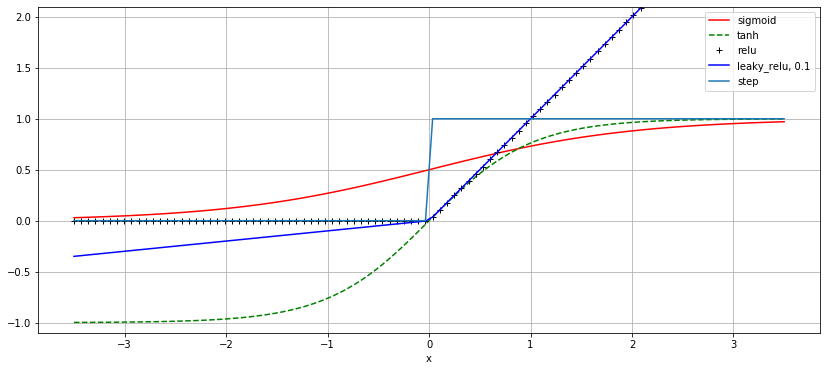

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1, 1)

ax1.set_xlabel('x')

x1 = np.linspace(-3.5, 3.5, num=100)
ax1.set_ylim(-1.1, 2.1)

sigmoid = 1 / (1 + np.exp(-x1)) 
ax1.plot(x1, sigmoid, 'r', label='sigmoid')
tanh = np.tanh(x1) 
ax1.plot(x1, tanh, 'g--', label='tanh')
relu = x1 * (x1 > 0) 
ax1.plot(x1, relu, 'k+', label='relu')
leaky_relu = x1 * (x1 > 0) + 0.1 * x1 * (x1 < 0) 
ax1.plot(x1, leaky_relu, 'b-', label='leaky_relu, 0.1')

step = 1 * (x1 > 0) 
ax1.plot(x1, step, '-', label='step')

ax1.grid(True)

fig.set_size_inches(14, 6)
plt.legend(loc='best')
plt.show()

### Регуляризация

$$ L(W, b) = - \sum\limits_j \ln \frac{e^{(x_jW + b)_{y_j}}}{\sum\limits_i e^{(x_jW + b)_{i}}} + \lambda R(W, b) \\
   R(W, b) = \|W\|_2^2 + \|b\|_2^2 \\
   \|b\|_2^2 = b_0^2 + \dots + b_k^2
$$

<div align="center">
    <img src="images/regularization.png" width=400/>
</div>


### Метод обратного распространения ошибки

### Граф вычислений

Внесём $b$ в $W$

$$ L(W) = - \sum\limits_j \ln p(c = y_j|x_j) + \lambda R(W) \\ \ $$

<div align="center">
    <img src="images/graph_calc.png" width=800/>
</div>

Хотим найти градиенты функции потерь $L$ по всем входам графа вычислений.


### Простой пример

Производная сложной функции $f(g(x))\ \ \to \frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx}$

Пусть $f(x, w) = 1 + e^{w_1x + w_0}$

<div align="center">
    <img src="images/simple_graph.png" width=600/>
</div>

$$ \frac{\partial f}{\partial f} = 1, \ f = c + 1, \ dc = \frac{\partial f}{\partial c} = 1, \dots$$


### Общая схема вычисления градиента

<div align="center">
    <img src="images/backprop_scheme.png" width=400/>
</div>


### Метод обратного распространения ошибки (backpropagation)

В итоге мы смогли вычислить все градиенты простыми операциями обратным проходом по графу

 * не выписывали всю производную целиком аналитически
 * на каждом шаге дифференцировали простую функцию
 * за один проход по графу вычислений
 * возможно распараллеливание

### В случае двуслойной нейросети

Выходные значения сети $a^m(x_i), m = 1 \dots M$ на объекте $x_i$:

$a^m(x_i) = \sigma_m \left( \sum\limits_{h=0}^H w_{hm} \color{red}{u^h(x_i)} \right)$

$\color{red}{u^h(x_i)} = \sigma_h \left( \sum\limits_{j=0}^J w_{jh} f_j(x_i) \right)$

Пусть для определенности

$\mathcal{L}_i (w) = \frac12 \sum\limits_{m=1}^M (a^m(x_i) - y_i^m)^2$

**Промежуточная задача**: частные производные

$\frac{\partial \mathcal{L}_i(w)}{\partial a^m},\ \ \frac{\partial \mathcal{L}_i(w)}{\partial u^h}$


### Быстрое дифференцирование. Вспомогательные градиенты

**Промежуточная задача**: частные производные

$\frac{\partial \mathcal{L}_i(w)}{\partial a^m} = a^m(x_i) - y_i^m = \varepsilon_i^m$

— это ошибка на выходном слое (для квадратичных потерь);

$\frac{\partial \mathcal{L}_i(w)}{\partial u^h} = \sum\limits_{m=1}^M (a^m(x_i) - y_i^m) \sigma_m^\prime w_{hm} = 
 \sum\limits_{m=1}^M \varepsilon_i^m \sigma_m^\prime w_{hm} = \varepsilon_i^h$

— назовём это *ошибкой на скрытом слое*.

Получается, что $\varepsilon_i^h$ вычисляется по $\varepsilon_i^m$, если запустить сеть «задом наперёд»:

<div align="center">
    <img src="images/backprop_eps.jpg" width=400/>
</div>


### Быстрое вычисление градиента

Теперь, имея частные производные $\mathcal{L}_i(w)$ по $a^m$ и $u^h$, легко выписать градиент $\mathcal{L}_i(w)$ по весам $w$:

$\frac{\partial \mathcal{L}_i(w)}{\partial w_{hm}} = \frac{\partial \mathcal{L}_i(w)}{\partial a^m} \frac{\partial a^m}{\partial w_{hm}} = \varepsilon_i^m \sigma^\prime_m u^h(x_i), \\ m = 1, \dots, M, h = 0, \dots, H$

$\frac{\partial \mathcal{L}_i(w)}{\partial w_{jh}} = \frac{\partial \mathcal{L}_i(w)}{\partial u^h} \frac{\partial u^h}{\partial w_{jh}} = \varepsilon_i^h \sigma^\prime_h f_j(x_i), \\ h = 1, \dots, H, j = 0, \dots, n$


### Алгоритм обратного распространения ошибки (BackPropagation)

1. инициализировать веса $w_{jh}, w_{hm}$

2. **повторять**
    3. выбрать объект $x_i$ из $X^\ell$ (например, случайно)
    4. прямой ход
    
    $u_i^h = \sigma_h \left(\sum_{j=0}^J w_{jh}x_i^j \right), h = 1, \dots, H$
    
    $a_i^m = \sigma_m \left(\sum_{h=0}^H w_{hm}u_i^h \right), \varepsilon_i^m = a_i^m - y_i^m, m =  1, \dots, M$
    
    $\mathcal{L}_i = \sum_{m=1}^M (\varepsilon_i^m)^2$

    5. обратный ход 
    
    $\varepsilon_i^h =\sum\limits_{m=1}^M \varepsilon_i^m \sigma_m^\prime w_{hm}, h = 1\dots H$

    6. градиентный шаг
    
    $w_{hm} = w_{hm} - \eta \varepsilon_i^m\sigma_m^\prime u_i^h, h = 0, \dots, H, m = 1\dots M$

    $w_{jh} = w_{jh} - \eta \varepsilon_i^h\sigma_h^\prime x_i^j, j = 0, \dots, n, h = 1\dots H$

    7. $Q = (1 - \lambda)Q + \lambda \mathcal{L}_i$

8. **пока** Q не стабилизируется

### Резюме

 * Нейрон = линейная классификация или регрессия
 * Нейронная сеть = суперпозиция нейронов с нелинейной функцией активации
 * BackPropagation =  быстрое дифференцирование суперпозиций. Позволяет обучать сети практически любой конфигурации
 * Методы улучшения сходимости и качества:
   - обучение по мини-подвыборкам (mini-batch)
   - различные функции активации
   - регуляризация
 * Не было на этой лекции
   - различные алгоритмы оптимизации: adam, RMSProp
   - dropout
   - выбор начального приближения
   
### Что ещё можно посмотреть?
 * Лекция 3 курса «DL на пальцах» от Семена Козлова: https://www.youtube.com/watch?v=kWTC1NvL894
 * 3blue1brown: https://www.youtube.com/watch?v=Ilg3gGewQ5U
 * В курсе Стенфорда: http://cs231n.github.io/optimization-2/
   

### Сверточная сеть — в следующем семестре

<div align="center">
    <img src="images/cnn_architecture.jpg" width=800 />
    <a href="https://www.pyimagesearch.com/wp-content/uploads/2014/06/cnn_architecture.jpg">
        Source</a> 
</div>